In [1]:
import apgpy as apg
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

Generate some data

In [2]:
n = 1000
m = 100
A = np.random.randn(m, n)
b = np.random.randn(m)
mu = 10

Define gradient operator

In [3]:
def quad_grad(y):
    return np.dot(A.T, (np.dot(A, y) - b))

Define proximal operator

In [4]:
def soft_thresh(y, t):
    return np.sign(y) * np.maximum(abs(y) - t * mu, 0)

Solve!

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.26e-04
iter num 100, norm(Gk)/(1+norm(xk)): 3.02e-04, step-size: 1.83e-03
iter num 200, norm(Gk)/(1+norm(xk)): 1.92e-12, step-size: 4.94e-03
iter num 203, norm(Gk)/(1+norm(xk)): 7.72e-13, step-size: 5.09e-03
terminated


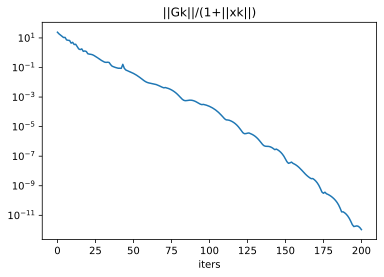

In [5]:
x = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_restart=True, eps=1e-12, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.26e-04
iter num 100, norm(Gk)/(1+norm(xk)): 1.70e-01, step-size: 1.83e-03
iter num 200, norm(Gk)/(1+norm(xk)): 7.49e-04, step-size: 4.94e-03
iter num 300, norm(Gk)/(1+norm(xk)): 1.00e-07, step-size: 3.28e-03
iter num 400, norm(Gk)/(1+norm(xk)): 3.52e-11, step-size: 2.69e-03
iter num 466, norm(Gk)/(1+norm(xk)): 9.28e-13, step-size: 5.19e-03
terminated


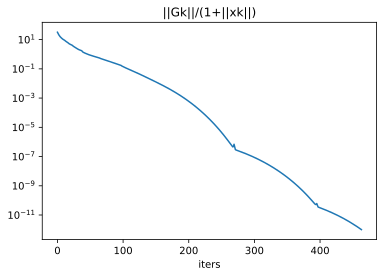

In [6]:
x_no_accleration = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_gra=True, eps = 1e-12, gen_plots=True)

iter num 0, norm(Gk)/(1+norm(xk)): nan, step-size: 8.26e-04
iter num 100, norm(Gk)/(1+norm(xk)): 2.65e-02, step-size: 1.83e-03
iter num 200, norm(Gk)/(1+norm(xk)): 3.93e-04, step-size: 4.94e-03
iter num 300, norm(Gk)/(1+norm(xk)): 1.67e-05, step-size: 4.06e-03
iter num 400, norm(Gk)/(1+norm(xk)): 1.94e-07, step-size: 5.43e-03
iter num 500, norm(Gk)/(1+norm(xk)): 6.86e-09, step-size: 3.38e-03
iter num 600, norm(Gk)/(1+norm(xk)): 3.03e-10, step-size: 2.85e-03
iter num 700, norm(Gk)/(1+norm(xk)): 2.30e-11, step-size: 4.01e-03
iter num 772, norm(Gk)/(1+norm(xk)): 9.41e-13, step-size: 4.76e-03
terminated


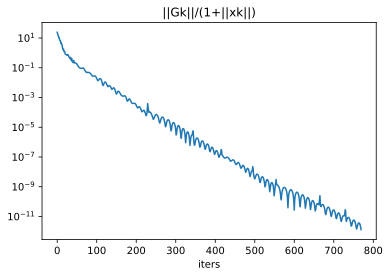

In [7]:
x_no_restart = apg.solve(quad_grad, soft_thresh, np.zeros(n), use_restart=False, eps=1e-12, gen_plots=True)

Compare to SCS (another first-order solver)

In [9]:
import cvxpy as cp

z = cp.Variable(n)
objective = cp.Minimize(0.5 * cp.sum_squares(A @ z - b) + mu * cp.norm(z, 1))
p = cp.Problem(objective)
p.solve(verbose=True, solver=cp.SCS)

----------------------------------------------------------------------------
	SCS v2.1.2 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012
----------------------------------------------------------------------------
Lin-sys: sparse-direct, nnz in A = 104002
eps = 1.00e-04, alpha = 1.50, max_iters = 5000, normalize = 1, scale = 1.00
acceleration_lookback = 0, rho_x = 1.00e-03
Variables n = 2001, constraints m = 2102
Cones:	linear vars: 2000
	soc vars: 102, soc blks: 1
WARN: aa_init returned NULL, no acceleration applied.
Setup time: 2.03e-02s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 3.70e+20  5.76e+20  1.00e+00 -2.74e+23  1.73e+20  5.79e+22  2.53e-02 
   100| 1.60e-03  1.61e-02  1.41e-02  3.62e+01  3.73e+01  5.53e-15  5.07e-02 
   200| 9.99e-04  1.24e-02  2.24e-02  3

30.64939123839937

Relative error:

In [11]:
print(np.linalg.norm(x - z.value) / np.linalg.norm(x))

0.000905189325812336


Print outputs

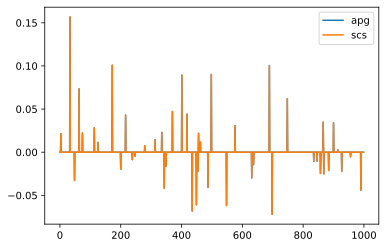

In [13]:
plt.plot(x, label='apg')
plt.plot(z.value, label='scs')
plt.legend()